## Описание проекта
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

### Описание данных
* Каждая запись в логе — это действие пользователя, или событие.
* EventName — название события;
* DeviceIDHash **— уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### Оглавление:

1. [Шаг №1. Откройте файл с данными и изучите общую информацию](#step1) 
2. [Шаг 2. Подготовьте данные](#step2)
3. [Шаг 3. Изучите и проверьте данные](#step3)
4. [Шаг 4. Изучите воронку событий](#step4)
5. [ Шаг 5. Изучите результаты эксперимента](#step5)
6. [ Шаг 5. Вывод](#step6)

### Шаг 1. Откройте файл с данными и изучите общую информацию<a id="step1"></a>   
</div>

Путь к файлу: /datasets/logs_exp.csv

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

logs_exp = pd.read_csv('/datasets/logs_exp.csv','\t')
logs_exp

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [19]:
logs_exp['EventTimestamp'] = pd.to_datetime(logs_exp['EventTimestamp'], unit='s')
logs_exp

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [20]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null datetime64[ns]
ExpId             244126 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


### Шаг 2. Подготовьте данные<a id="step2"></a>   
</div>

#### * Замените названия столбцов на удобные для вас;

#### * Проверьте пропуски и типы данных. Откорректируйте, если нужно;

#### * Добавьте столбец даты и времени, а также отдельный столбец дат;

In [21]:
logs_exp.duplicated().sum()

413

In [22]:
logs_exp.isnull().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [23]:
logs_exp = logs_exp.drop_duplicates(keep=False)
logs_exp.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [24]:
logs_exp['date'] = logs_exp.EventTimestamp.dt.to_period('d')
logs_exp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EventName,DeviceIDHash,EventTimestamp,ExpId,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


### Шаг 3. Изучите и проверьте данные<a id="step3"></a>   
</div>

#### Сколько всего событий в логе?

In [25]:
num_events = logs_exp.shape[0]
num_events

243358

#### Сколько всего пользователей в логе?

In [26]:
num_users = logs_exp['DeviceIDHash'].nunique()
num_users

7550

#### Сколько в среднем событий приходится на пользователя?

In [27]:
print('В среднем событий на пользователя приходится',\
      logs_exp.shape[0]/logs_exp['DeviceIDHash'].nunique())

В среднем событий на пользователя приходится 32.23284768211921


#### Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

In [28]:
logs_exp.sort_values(by=['EventTimestamp'], ascending=True)

,EventName,DeviceIDHash,EventTimestamp,ExpId,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


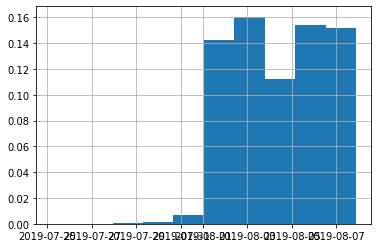

In [29]:
h = logs_exp['EventTimestamp'].hist(density = True)
fig = h.get_figure()

In [30]:
logs_exp.drop(logs_exp.loc[logs_exp['date']<'2019-08-01'].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


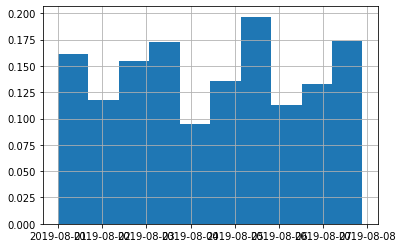

In [31]:
h = logs_exp['EventTimestamp'].hist(density = True)
fig = h.get_figure()

#### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [32]:
num_events_new = logs_exp.shape[0]
num = (100 - num_events_new*100/num_events)
print(num , ' % событий потеряли, отбросив старые данные')

1.160430312543653  % событий потеряли, отбросив старые данные


In [33]:
num_users_new = logs_exp['DeviceIDHash'].nunique()
users = (100 - num_users_new*100/num_users)
print(users , ' % пользователей потеряли, отбросив старые данные')

0.22516556291390089  % пользователей потеряли, отбросив старые данные


#### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [34]:
logs_exp.groupby('ExpId')['DeviceIDHash'].nunique()

ExpId
246    2483
247    2513
248    2537
Name: DeviceIDHash, dtype: int64

### Шаг 4. Изучите воронку событий<a id="step4"></a>   
</div>

#### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [35]:
logs_exp['EventName'].value_counts()

MainScreenAppear           117226
OffersScreenAppear          46317
CartScreenAppear            42241
PaymentScreenSuccessful     33765
Tutorial                      985
Name: EventName, dtype: int64

#### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [36]:
log = logs_exp.groupby("EventName")["DeviceIDHash"].nunique().to_frame().sort_values(by=['DeviceIDHash'], ascending=False)
log['fraction'] = log['DeviceIDHash']/(log['DeviceIDHash'].sum())
log['percent'] = log['DeviceIDHash']*100/(log['DeviceIDHash'].max())
log

,DeviceIDHash,fraction,percent
EventName,,,
MainScreenAppear,7418,0.368670,100.000000
OffersScreenAppear,4593,0.228269,61.916959
CartScreenAppear,3734,0.185577,50.337018
PaymentScreenSuccessful,3536,0.175737,47.667835
Tutorial,840,0.041747,11.323807


#### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

* main_screen - offer - cart - payment_successful 
* Предполагаю что Tutorial можно не рассматривать	

In [37]:
logs_exp.drop(logs_exp.loc[logs_exp['EventName']=='Tutorial'].index, inplace=True)
logs_exp.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId,date
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01


#### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием B к количеству пользователей с событием C.

In [38]:
logs = logs_exp.groupby("EventName")["DeviceIDHash"].nunique().to_frame().sort_values(by=['DeviceIDHash'], ascending=False)
logs['fraction'] = logs['DeviceIDHash']/(logs['DeviceIDHash'].sum())
logs['next_step_fraction'] = logs['DeviceIDHash'].shift(-1)/logs['DeviceIDHash']
logs['percent'] = logs['DeviceIDHash']*100/num_users_new
logs

,DeviceIDHash,fraction,next_step_fraction,percent
EventName,,,,
MainScreenAppear,7418,0.384731,0.619170,98.473384
OffersScreenAppear,4593,0.238214,0.812976,60.971724
CartScreenAppear,3734,0.193662,0.946974,49.568565
PaymentScreenSuccessful,3536,0.183393,NaN,46.940130


#### На каком шаге теряете больше всего пользователей?

Больше всего пользователей мы теряем при переходе с MainScreenAppear на OffersScreenAppear

#### Какая доля пользователей доходит от первого события до оплаты?

In [39]:
a = (log['DeviceIDHash'].shift(-3)*100/log['DeviceIDHash']).max().round(1)
print('От первого события до оплаты доходит', a ,'доля пользователей')

От первого события до оплаты доходит 47.7 доля пользователей


### Шаг 5. Изучите результаты эксперимента<a id="step5"></a>   
</div>

#### Сколько пользователей в каждой экспериментальной группе?

In [40]:
logs_exp.groupby("ExpId")["DeviceIDHash"].nunique().to_frame().sort_values(by=['DeviceIDHash'], ascending=False)

,DeviceIDHash
ExpId,
248,2535
247,2512
246,2482


#### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [41]:
group = logs_exp[logs_exp['ExpId'] != 248].groupby(["EventName","ExpId"])["DeviceIDHash"].nunique()\
.to_frame().sort_values(by=['DeviceIDHash'], ascending=False)
group['next_step_fraction'] = group['DeviceIDHash'].shift(-1)/logs['DeviceIDHash']
group

DeviceIDHash  next_step_fraction
EventName               ExpId                                  
MainScreenAppear        247            2476            0.330143
                        246            2449            0.207873
OffersScreenAppear      246            1542            0.330938
                        247            1520            0.275637
CartScreenAppear        246            1266            0.331548
                        247            1238            0.321103
PaymentScreenSuccessful 246            1199            0.326923
                        247            1156                 NaN

In [42]:
group_247 = logs_exp[logs_exp['ExpId'] == 247].groupby(["date"])["DeviceIDHash"].nunique()\
.to_frame()
group_247 = group_247['DeviceIDHash'].tolist()
group_247

[1282, 1220, 1174, 1169, 1263, 1320, 1212]

In [43]:
group_246 = logs_exp[logs_exp['ExpId'] == 246].groupby(["date"])["DeviceIDHash"].nunique()\
.to_frame()
group_246 = group_246['DeviceIDHash'].tolist()
group_246

[1191, 1197, 1140, 1170, 1269, 1268, 1198]

  ###### Сравниваем выборки 247 246 по величине  - количестува пользователей в день. Скорректированное значение требуемого уровня значимости поправкой Шидаки.   

In [154]:
#В случае идет сравниваются 3 пары групп, 4 сравнения в каждой паре. Общее число тестов 1 * 2 = 2. 
#Поправка Шидака 1-(1-а)^(1/12)
a=0.05
alpha = 1-(1-a)**(1/(1*2))
alpha

0.025320565519103666

In [155]:
results_AB = st.ttest_ind(
    group_247, 
    group_246)


print('p-значение для сравнения групп А1 и А2: ', results_AB.pvalue)

if (results_AB.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для сравнения групп А1 и А2")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и А2")

p-значение для сравнения групп А1 и А2:  0.51967052439625
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и А2


#### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [156]:
total = logs_exp.groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
total.columns = ['ExpId' , 'date' ,'users_total']
total.head(5)

,ExpId,date,users_total
0,246,2019-08-01,1191
1,246,2019-08-02,1197
2,246,2019-08-03,1140
3,246,2019-08-04,1170
4,246,2019-08-05,1269


##### Самое популярное событие - MainScreenAppear.  Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп.

In [47]:
log_MainScreenAppear = logs_exp[logs_exp['EventName'] == 'MainScreenAppear'].groupby(["EventName","ExpId", 'date'])\
["DeviceIDHash"].nunique()\
.to_frame().sort_values(by=['DeviceIDHash'], ascending=False)
log_MainScreenAppear.head(5)

DeviceIDHash
EventName        ExpId date                    
MainScreenAppear 248   2019-08-06          1280
                 247   2019-08-06          1271
                       2019-08-01          1216
                 248   2019-08-05          1214
                 246   2019-08-06          1214

In [48]:
log_MainScreenAppear = log_MainScreenAppear.merge(total , on=['ExpId', 'date'], validate = "1:1")
log_MainScreenAppear.head(5)

,ExpId,date,DeviceIDHash,users_total
0,248,2019-08-06,1280,1331
1,247,2019-08-06,1271,1320
2,247,2019-08-01,1216,1282
3,248,2019-08-05,1214,1269
4,246,2019-08-06,1214,1268


In [49]:
log_MainScreenAppear['persent'] = log_MainScreenAppear['DeviceIDHash']*100 / log_MainScreenAppear['users_total']
log_MainScreenAppear.head(5)

,ExpId,date,DeviceIDHash,users_total,persent
0,248,2019-08-06,1280,1331,96.168295
1,247,2019-08-06,1271,1320,96.287879
2,247,2019-08-01,1216,1282,94.851794
3,248,2019-08-05,1214,1269,95.665879
4,246,2019-08-06,1214,1268,95.741325


##### Будем смотреть стат значимость выборок по следующей величине - воронка пользоватейлей (отношение всех пользователей перешедших на главную страницу) 

In [50]:
group_246 = log_MainScreenAppear[log_MainScreenAppear['ExpId'] == 246].sort_values(by='date', ascending=False)["persent"]
group_246 = group_246.tolist()
group_246

[95.40901502504174,
 95.74132492113564,
 95.19306540583136,
 95.12820512820512,
 94.64912280701755,
 95.57226399331662,
 95.71788413098237]

In [79]:
group_247 = log_MainScreenAppear[log_MainScreenAppear['ExpId'] == 247].sort_values(by='date', ascending=False)["persent"]
group_247 = group_247.tolist()
group_247

[95.54455445544555,
 96.28787878787878,
 93.82422802850357,
 94.52523524379812,
 95.14480408858603,
 95.65573770491804,
 94.85179407176287]

In [80]:
group_248 = log_MainScreenAppear[log_MainScreenAppear['ExpId'] == 248].sort_values(by='date', ascending=False)["persent"]
group_248 = group_248.tolist()
group_248

[95.1651893634166,
 96.16829451540195,
 95.66587864460205,
 95.62289562289563,
 94.76843910806176,
 95.60260586319218,
 96.82410423452768]

In [111]:
a=0.05
alpha_2 = 1-(1-a)**(1/(3*1))
alpha_2

0.016952427508441503

In [157]:
results_AB = st.ttest_ind(
    group_246, 
    group_247)

results_BC = st.ttest_ind(
    group_247, 
    group_248)

results_AC = st.ttest_ind(
    group_246, 
    group_248)

print('Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на главную страницу) статистически не отличима')
print('alpha: ',alpha_2)
print('p-значение для сравнения групп А1 и А2: ', results_AB.pvalue)
print('p-значение для сравнения групп А2 и B: ', results_BC.pvalue)
print('p-значение для сравнения групп А1 и B: ', results_AC.pvalue)

if (results_AB.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу для сравнения групп А1 и A2")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2")

if (results_BC.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу для сравнения групп A2 и B")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B")

if (results_AC.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу для сравнения групп А1 и B")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B")

Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на главную страницу) статистически не отличима
alpha:  0.016952427508441503
p-значение для сравнения групп А1 и А2:  0.51967052439625
p-значение для сравнения групп А2 и B:  0.17637434041222805
p-значение для сравнения групп А1 и B:  0.26044916901095916
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2
Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B


Проделаем все тоже самое для других событий

In [126]:
total = logs_exp.groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
total.columns = ['ExpId' , 'date' ,'users_total']
total.head(5)

,ExpId,date,users_total
0,246,2019-08-01,1191
1,246,2019-08-02,1197
2,246,2019-08-03,1140
3,246,2019-08-04,1170
4,246,2019-08-05,1269


In [127]:
MainScreenAppear = logs_exp[logs_exp['EventName'] == 'MainScreenAppear'].groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
MainScreenAppear.columns = ['ExpId' , 'date' ,'users_MainScreenAppear']
MainScreenAppear.head(5)

,ExpId,date,users_MainScreenAppear
0,246,2019-08-01,1140
1,246,2019-08-02,1144
2,246,2019-08-03,1079
3,246,2019-08-04,1113
4,246,2019-08-05,1208


In [128]:
MainScreenAppear = logs_exp[logs_exp['EventName'] == 'MainScreenAppear'].groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
MainScreenAppear.columns = ['ExpId' , 'date' ,'users_MainScreenAppear']
MainScreenAppear.head(5)

,ExpId,date,users_MainScreenAppear
0,246,2019-08-01,1140
1,246,2019-08-02,1144
2,246,2019-08-03,1079
3,246,2019-08-04,1113
4,246,2019-08-05,1208


In [129]:
OffersScreenAppear = logs_exp[logs_exp['EventName'] == 'OffersScreenAppear'].groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
OffersScreenAppear.columns = ['ExpId' , 'date' ,'users_OffersScreenAppear']
OffersScreenAppear.head(5)

,ExpId,date,users_OffersScreenAppear
0,246,2019-08-01,656
1,246,2019-08-02,687
2,246,2019-08-03,698
3,246,2019-08-04,697
4,246,2019-08-05,733


In [130]:
CartScreenAppear = logs_exp[logs_exp['EventName'] == 'CartScreenAppear'].groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
CartScreenAppear.columns = ['ExpId' , 'date' ,'users_CartScreenAppear']
CartScreenAppear.head(5)

,ExpId,date,users_CartScreenAppear
0,246,2019-08-01,497
1,246,2019-08-02,513
2,246,2019-08-03,504
3,246,2019-08-04,497
4,246,2019-08-05,525


In [131]:
PaymentScreenSuccessful = logs_exp[logs_exp['EventName'] == 'PaymentScreenSuccessful'].groupby(["ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
PaymentScreenSuccessful.columns = ['ExpId' , 'date' ,'users_PaymentScreenSuccessful']
PaymentScreenSuccessful.head(5)

,ExpId,date,users_PaymentScreenSuccessful
0,246,2019-08-01,452
1,246,2019-08-02,468
2,246,2019-08-03,483
3,246,2019-08-04,465
4,246,2019-08-05,491


In [132]:
Full = MainScreenAppear.merge(total , on=['ExpId', 'date'], validate = "1:1")
Full.head(5)

,ExpId,date,users_MainScreenAppear,users_total
0,246,2019-08-01,1140,1191
1,246,2019-08-02,1144,1197
2,246,2019-08-03,1079,1140
3,246,2019-08-04,1113,1170
4,246,2019-08-05,1208,1269


In [133]:
Full = Full.merge(OffersScreenAppear , on=['ExpId', 'date'], validate = "1:1")
Full.head(5)

,ExpId,date,users_MainScreenAppear,users_total,users_OffersScreenAppear
0,246,2019-08-01,1140,1191,656
1,246,2019-08-02,1144,1197,687
2,246,2019-08-03,1079,1140,698
3,246,2019-08-04,1113,1170,697
4,246,2019-08-05,1208,1269,733


In [134]:
Full = Full.merge(CartScreenAppear , on=['ExpId', 'date'], validate = "1:1")
Full.head(5)

,ExpId,date,users_MainScreenAppear,users_total,users_OffersScreenAppear,users_CartScreenAppear
0,246,2019-08-01,1140,1191,656,497
1,246,2019-08-02,1144,1197,687,513
2,246,2019-08-03,1079,1140,698,504
3,246,2019-08-04,1113,1170,697,497
4,246,2019-08-05,1208,1269,733,525


In [135]:
Full = Full.merge(PaymentScreenSuccessful , on=['ExpId', 'date'], validate = "1:1")
Full.head(5)

,ExpId,date,users_MainScreenAppear,users_total,users_OffersScreenAppear,users_CartScreenAppear,users_PaymentScreenSuccessful
0,246,2019-08-01,1140,1191,656,497,452
1,246,2019-08-02,1144,1197,687,513,468
2,246,2019-08-03,1079,1140,698,504,483
3,246,2019-08-04,1113,1170,697,497,465
4,246,2019-08-05,1208,1269,733,525,491


In [158]:
def Sravnenie(data, col1, col2):
    x = data
    x['persent'] = x[col2]*100/x[col1]
    alpha = 1-(1-a)**(1/(3*1))
    
    A1 = x[x['ExpId'] == 246].sort_values(by='date', ascending=False)["persent"].tolist()        
    A2 = x[x['ExpId'] == 247].sort_values(by='date', ascending=False)["persent"].tolist()        
    B  = x[x['ExpId'] == 248].sort_values(by='date', ascending=False)["persent"].tolist() 
    print(A1)
    print(A2)
    print(B)
    
    results_AB = st.ttest_ind(
    A1, 
    A2)

    results_BC = st.ttest_ind(
    A2, 
    B)

    results_AC = st.ttest_ind(
    A1, 
    B)

    print('Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима')
    print('alpha: ',alpha)
    print('p-значение для сравнения групп А1 и A2: ', results_AB.pvalue)
    print('p-значение для сравнения групп A2 и B: ', results_BC.pvalue)
    print('p-значение для сравнения групп А1 и B: ', results_AC.pvalue)

    if (results_AB.pvalue < alpha):
        print("Отвергаем нулевую гипотезу для сравнения групп А1 и A2")
    else:
        print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2")

    if (results_BC.pvalue < alpha):
        print("Отвергаем нулевую гипотезу для сравнения групп B и B")
    else:
        print("Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B")

    if (results_AC.pvalue < alpha):
        print("Отвергаем нулевую гипотезу для сравнения групп А1 и B")
    else:
        print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B")
    

In [159]:
Sravnenie(Full, 'users_total', 'users_MainScreenAppear')

[95.40901502504174, 95.74132492113564, 95.19306540583136, 95.12820512820512, 94.64912280701755, 95.57226399331662, 95.71788413098237]
[95.54455445544555, 96.28787878787878, 93.82422802850357, 94.52523524379812, 95.14480408858603, 95.65573770491804, 94.85179407176287]
[95.1651893634166, 96.16829451540195, 95.66587864460205, 95.62289562289563, 94.76843910806176, 95.60260586319218, 96.82410423452768]
Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима
alpha:  0.016952427508441503
p-значение для сравнения групп А1 и A2:  0.51967052439625
p-значение для сравнения групп A2 и B:  0.17637434041222805
p-значение для сравнения групп А1 и B:  0.26044916901095916
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2
Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B


In [160]:
Sravnenie(Full, 'users_total', 'users_OffersScreenAppear')

[58.59766277128548, 56.54574132492114, 57.76201733648542, 59.572649572649574, 61.228070175438596, 57.393483709273184, 55.07976490344249]
[55.363036303630366, 54.92424242424242, 55.89865399841647, 59.709153122326775, 59.54003407155025, 54.75409836065574, 55.61622464898596]
[55.519742143432715, 54.47032306536439, 56.02836879432624, 58.08080808080808, 57.890222984562605, 58.22475570032573, 55.45602605863192]
Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима
alpha:  0.016952427508441503
p-значение для сравнения групп А1 и A2:  0.20685145284411263
p-значение для сравнения групп A2 и B:  0.9847788505736788
p-значение для сравнения групп А1 и B:  0.14098688687508423
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2
Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B


In [161]:
Sravnenie(Full, 'users_total', 'users_CartScreenAppear')

[40.90150250417362, 40.37854889589905, 41.371158392434985, 42.47863247863248, 44.21052631578947, 42.857142857142854, 41.729638958858104]
[38.943894389438945, 37.42424242424242, 40.53840063341251, 44.56800684345595, 41.90800681431005, 40.57377049180328, 39.78159126365055]
[38.03384367445609, 39.21863260706236, 40.189125295508276, 42.003367003367, 43.56775300171527, 42.100977198697066, 40.960912052117266]
Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима
alpha:  0.016952427508441503
p-значение для сравнения групп А1 и A2:  0.16681343461662756
p-значение для сравнения групп A2 и B:  0.7698383230353065
p-значение для сравнения групп А1 и B:  0.21939263943214726
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2
Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B


In [162]:
Sravnenie(Full, 'users_total', 'users_PaymentScreenSuccessful')

[38.64774624373957, 38.32807570977918, 38.69188337273444, 39.743589743589745, 42.36842105263158, 39.097744360902254, 37.95130142737196]
[37.37623762376238, 35.53030303030303, 37.52969121140143, 41.57399486740804, 38.67120954003407, 37.131147540983605, 35.101404056162245]
[35.61643835616438, 37.41547708489857, 37.903861308116625, 39.73063973063973, 40.65180102915952, 38.273615635179155, 38.192182410423456]
Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима
alpha:  0.016952427508441503
p-значение для сравнения групп А1 и A2:  0.11031287172918001
p-значение для сравнения групп A2 и B:  0.5069457337194825
p-значение для сравнения групп А1 и B:  0.24852108308470056
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2
Не получилось отвергнуть нулевую гипотезу для сравнения групп A2 и B
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и B


 Шрифты не влияют на воронку.

#### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [141]:
logs_exp['new_ExpId'] = logs_exp['ExpId']
logs_exp.loc[logs_exp['new_ExpId'] == 246, 'new_ExpId'] = 'test'
logs_exp.loc[logs_exp['new_ExpId'] == 247, 'new_ExpId'] = 'test'
logs_exp.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EventName,DeviceIDHash,EventTimestamp,ExpId,date,new_ExpId
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,test
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,test
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,test
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,test
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01,test


In [142]:
total_joined = logs_exp.groupby(["new_ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
total_joined.columns = ['ExpId' , 'date' ,'users_total']
total_joined.head(5)

,ExpId,date,users_total
0,248,2019-08-01,1228
1,248,2019-08-02,1228
2,248,2019-08-03,1166
3,248,2019-08-04,1188
4,248,2019-08-05,1269


In [143]:
MainScreenAppear_joined = logs_exp[logs_exp['EventName'] == 'MainScreenAppear'].groupby(["new_ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
MainScreenAppear_joined.columns = ['ExpId' , 'date' ,'users_MainScreenAppear']
MainScreenAppear_joined.head(5)

,ExpId,date,users_MainScreenAppear
0,248,2019-08-01,1189
1,248,2019-08-02,1174
2,248,2019-08-03,1105
3,248,2019-08-04,1136
4,248,2019-08-05,1214


In [144]:
OffersScreenAppear_joined = logs_exp[logs_exp['EventName'] == 'OffersScreenAppear'].groupby(["new_ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
OffersScreenAppear_joined.columns = ['ExpId' , 'date' ,'users_OffersScreenAppear']
OffersScreenAppear_joined.head(5)

,ExpId,date,users_OffersScreenAppear
0,248,2019-08-01,681
1,248,2019-08-02,715
2,248,2019-08-03,675
3,248,2019-08-04,690
4,248,2019-08-05,711


In [145]:
CartScreenAppear_joined = logs_exp[logs_exp['EventName'] == 'CartScreenAppear'].groupby(["new_ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
CartScreenAppear_joined.columns = ['ExpId' , 'date' ,'users_CartScreenAppear']
CartScreenAppear_joined.head(5)

,ExpId,date,users_CartScreenAppear
0,248,2019-08-01,503
1,248,2019-08-02,517
2,248,2019-08-03,508
3,248,2019-08-04,499
4,248,2019-08-05,510


In [146]:
PaymentScreenSuccessful_joined = logs_exp[logs_exp['EventName'] == 'PaymentScreenSuccessful'].groupby(["new_ExpId", 'date'])["DeviceIDHash"].nunique().to_frame().reset_index()
PaymentScreenSuccessful_joined.columns = ['ExpId' , 'date' ,'users_PaymentScreenSuccessful']
PaymentScreenSuccessful_joined.head(5)

,ExpId,date,users_PaymentScreenSuccessful
0,248,2019-08-01,469
1,248,2019-08-02,470
2,248,2019-08-03,474
3,248,2019-08-04,472
4,248,2019-08-05,481


In [147]:
Full_joined = MainScreenAppear_joined.merge(total_joined , on=['ExpId', 'date'], validate = "1:1")
Full_joined.head(5)

,ExpId,date,users_MainScreenAppear,users_total
0,248,2019-08-01,1189,1228
1,248,2019-08-02,1174,1228
2,248,2019-08-03,1105,1166
3,248,2019-08-04,1136,1188
4,248,2019-08-05,1214,1269


In [148]:
Full_joined = Full_joined.merge(OffersScreenAppear_joined , on=['ExpId', 'date'], validate = "1:1")
Full_joined = Full_joined.merge(CartScreenAppear_joined , on=['ExpId', 'date'], validate = "1:1")
Full_joined = Full_joined.merge(PaymentScreenSuccessful_joined , on=['ExpId', 'date'], validate = "1:1")
Full_joined.head(5)

,ExpId,date,users_MainScreenAppear,users_total,users_OffersScreenAppear,users_CartScreenAppear,users_PaymentScreenSuccessful
0,248,2019-08-01,1189,1228,681,503,469
1,248,2019-08-02,1174,1228,715,517,470
2,248,2019-08-03,1105,1166,675,508,474
3,248,2019-08-04,1136,1188,690,499,472
4,248,2019-08-05,1214,1269,711,510,481


In [163]:
def Sravnenie_joined(data, col1, col2):
    x = data
    x['persent'] = x[col2]*100/x[col1]
    alpha = 1-(1-a)**(1/(1*2))
    
    A1 = x[x['ExpId'] == 'test'].sort_values(by='date', ascending=False)["persent"].tolist()        
    B  = x[x['ExpId'] == 248].sort_values(by='date', ascending=False)["persent"].tolist() 
    print(A1)
    print(B)
    
    
    results_AC = st.ttest_ind(
    A1, 
    B)

    print('Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима')
    print('alpha: ',alpha)
    print('p-значение для сравнения групп A (объедененная группа А1 и А2) и B: ', results_AC.pvalue)
    
    if (results_AC.pvalue < alpha):
        print("Отвергаем нулевую гипотезу для сравнения групп A (объедененная группа А1 и А2) и B")
    else:
        print("Не получилось отвергнуть нулевую гипотезу для сравнения групп A (объедененная группа А1 и А2) и B")

    

In [164]:
Sravnenie_joined(Full_joined, 'users_total', 'users_MainScreenAppear')

[95.47717842323651, 96.02009273570324, 94.51026856240127, 94.82684908080377, 94.90060501296456, 95.61439801406702, 95.2689041649818]
[95.1651893634166, 96.16829451540195, 95.66587864460205, 95.62289562289563, 94.76843910806176, 95.60260586319218, 96.82410423452768]
Гипотеза - воронка пользоватейлей (отношение всех пользователей перешедших на страницу) статистически не отличима
alpha:  0.025320565519103666
p-значение для сравнения групп A (объедененная группа А1 и А2) и B:  0.17758659557165632
Не получилось отвергнуть нулевую гипотезу для сравнения групп A (объедененная группа А1 и А2) и B


#### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Я уровень зачимости брала 0,05 и пользовалась методом Шидаки и каждый критей смотрела отдельно с альфой alpha = 1-(1-a)**(1/(3*1)) = 0.016 - когда я смотреле A1, A2 и В . И alpha = 1-(1-a)**(1/(1*2)) = 0,02. Но так как я смотрела по нескольким критериям альфу надо было брать alpha = 1-(1-a)**(1/(3*4)) = 0.004 и alpha = 1-(1-a)**(1/(4*2)) = 0.006

### Вывод<a id="step6"></a>   
</div>

Две контрольные группы равны, мы можем быть уверены в точности проведенного тестирования. Шрифты не влияют на воронку.